Specialization- Data Analyst
 /Group Name- Data Storytellers
 
Laxmi Rathna Mrinalini Dutt Innamuri,
mrinalinidutt.ilr@gmail.com,
United Arab Emirates


Problem Description

XYZ credit union in Latin America is performing very well in selling the Banking products (eg: Credit card, deposit account, retirement account, safe deposit box etc) but their existing customer is not not buying more than 1 product which means bank is not performing good in cross selling (Bank is not able to sell their other offerings to existing customer). 
What action bank can take to increase cross selling?


Business Understanding

Customer centric view- Effective cross-sellers build a customer-centric view of opportunity and take a longer-term view of customer value rather than product-centric view of cross-selling.
Single view of the customer- Having into consideration product usage and transactional history, service history, etc. Identifying patterns of behavior across products is essential for understanding and anticipating customer needs to provide the most appropriate engagement, in the form of products they don’t yet have, services they don’t yet use.

Using customer data such as transaction behavior, existing accounts, lifestyle factors and demographics to customize cross-sell offers and provide personalized recommendations based on each customer’s current and future needs.

Maximize segmentation- Customers face different needs at different times in their life. Selling bank products relevant to each new point in their life cycle simply makes sense. 
Segmenting your customers into groups based on most-likely cross-sell opportunities. 

In order to properly prepare to cross sell your clients, you should know which items sell best for you and what items pair well with your best sellers.

Channels- Marketing is fundamentally about target audience, while the channel is the means of delivering a message to that audience. Thus, Channel used by customer also plays an important role in cross-selling.
Products & Services- In order to properly prepare to cross sell your clients, you should know which items sell best for you and what items pair well with your best sellers through studying past Sales data against the products & services you currently offer. When you’re selling additional products and services to clients it’s important to show them the additional value the products or service.

Cross Selling vs. Upselling-While cross selling and upselling in banking are both useful techniques for boosting sales, they are completely different. They can be used individually or together for maximum results.
Cross selling is when you sell another complementary product or service to an existing customer. The products or services you are cross selling should go well with what your customers are already purchasing.
Upselling happens when you sell your client more expensive products in addition to what they’re already purchasing. In order to effectively upsell you must sell the value that comes with the upgraded version of a product or service. Comparison charts help show the extra value that comes with purchasing the next level up.  


Input Features
From column 1 to column 24 are the input features, which contain 21 categorical features and 3 continuous features. The input features contain customers’ demographic and status with the bank information. On top of this, the observations are in the time series format. The data contains each customer’s information from January 2015 to May 2016.

Output Features
From column 25 to column 48 are the output features, which contains the product purchased information according to each customer from January 2015 to May 2016. Each column stands for one product, and there are 24 products in total.

Objective

 To perform Exploratoray Data Analysis


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import plotly.express as px
import plotly.graph_objs as go
import plotly
import plotly.graph_objects as go
import datetime
import warnings
%matplotlib inline
warnings.filterwarnings("ignore")

In [ ]:
pathfile1= "C:/Users/pavan/JN/Train.csv"
TrainData = pd.read_csv("C:/Users/pavan/JN/Train.csv")

In [5]:
print('Number of rows in train set', TrainData.shape[0])
print('Number of Unique Customer in train set:', len(set(TrainData.ncodpers.unique())))

Number of rows in train set 13647309
Number of Unique Customer in train set: 956645


In [6]:
TrainData.head(10)

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
3,2015-01-28,1050613,N,ES,H,22,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
4,2015-01-28,1050614,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
5,2015-01-28,1050615,N,ES,H,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
6,2015-01-28,1050616,N,ES,H,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
7,2015-01-28,1050617,N,ES,H,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
8,2015-01-28,1050619,N,ES,H,24,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
9,2015-01-28,1050620,N,ES,H,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0


### Selecting sample dataset of 5 million rows

In [8]:
del TrainData

In [9]:
CustomerData = pd.read_csv('C:/Users/pavan/JN/Train.csv',
                              dtype={"sexo":str, "ind_nuevo":str, 
                                      "ult_fec_cli_1t":str, 
                                      "indext":str}, nrows=5e6)

In [10]:
n = 500000
unique_ids = pd.Series(CustomerData["ncodpers"].unique())
unique_id = unique_ids.sample(n)
CustomerData = CustomerData[CustomerData.ncodpers.isin(unique_id)]

In [11]:

CustomerData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2985038 entries, 1 to 4999996
Data columns (total 48 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   fecha_dato             object 
 1   ncodpers               int64  
 2   ind_empleado           object 
 3   pais_residencia        object 
 4   sexo                   object 
 5   age                    object 
 6   fecha_alta             object 
 7   ind_nuevo              object 
 8   antiguedad             object 
 9   indrel                 float64
 10  ult_fec_cli_1t         object 
 11  indrel_1mes            object 
 12  tiprel_1mes            object 
 13  indresi                object 
 14  indext                 object 
 15  conyuemp               object 
 16  canal_entrada          object 
 17  indfall                object 
 18  tipodom                float64
 19  cod_prov               float64
 20  nomprov                object 
 21  ind_actividad_cliente  float64
 22  renta             

### Missing Values in the columns

In [12]:
CustomerData.isnull().sum()

fecha_dato                     0
ncodpers                       0
ind_empleado               16507
pais_residencia            16507
sexo                       16522
age                            0
fecha_alta                 16507
ind_nuevo                  16507
antiguedad                     0
indrel                     16507
ult_fec_cli_1t           2980953
indrel_1mes                26333
tiprel_1mes                26333
indresi                    16507
indext                     16507
conyuemp                 2984596
canal_entrada              28419
indfall                    16507
tipodom                    16507
cod_prov                   33619
nomprov                    33619
ind_actividad_cliente      16507
renta                     520063
segmento                   28651
ind_ahor_fin_ult1              0
ind_aval_fin_ult1              0
ind_cco_fin_ult1               0
ind_cder_fin_ult1              0
ind_cno_fin_ult1               0
ind_ctju_fin_ult1              0
ind_ctma_f

In [15]:
#converting datatype of dates
CustomerData['fecha_dato'] = pd.to_datetime(CustomerData['fecha_dato'])
CustomerData['fecha_alta'] = pd.to_datetime(CustomerData['fecha_alta'])
CustomerData['ult_fec_cli_1t'] = pd.to_datetime(CustomerData['ult_fec_cli_1t'])

In [16]:
#Deleting the columns "ult_fec_cli_1t" and "conyuemp" which has highest missing values
CustomerData = CustomerData.drop(["ult_fec_cli_1t", "conyuemp"], axis=1) 

In [17]:
#ind_empleado","ind_nuevo","indresi" have same number of missing values. Checking if the same rows?
CustomerData.loc[CustomerData["pais_residencia"].isnull(),["ind_empleado","ind_nuevo","indresi"]].head()

,ind_empleado,ind_nuevo,indresi
261,NaN,NaN,NaN
1063,NaN,NaN,NaN
1154,NaN,NaN,NaN
1867,NaN,NaN,NaN
1886,NaN,NaN,NaN


In [18]:
# Converting into numbers
CustomerData.indrel_1mes = pd.to_numeric(CustomerData.indrel_1mes, errors = 'coerce')
CustomerData.age = pd.to_numeric(CustomerData.age, errors = 'coerce')
CustomerData.antiguedad = pd.to_numeric(CustomerData.antiguedad, errors = 'coerce')

In [19]:
# Checking the active months of customers with data missing 
months_active = CustomerData.loc[CustomerData["ind_nuevo"].isnull(),:].groupby("ncodpers", sort=False).size()
months_active.max()

6

In [38]:
# As the customer is new lets update with 1
CustomerData.loc[CustomerData["ind_nuevo"].isnull(),"ind_nuevo"] =  1

In [40]:
CustomerData.ind_nuevo = pd.to_numeric(CustomerData.ind_nuevo, errors = 'coerce')
print(CustomerData["ind_nuevo"].value_counts(dropna = False))

0    2921342
1      63696
Name: ind_nuevo, dtype: int64


In [44]:
# Assuming same people 
CustomerData.loc[CustomerData.antiguedad.isnull(),"antiguedad"] = CustomerData.antiguedad.min()
CustomerData.loc[CustomerData.antiguedad <0, "antiguedad"]      = 0

In [45]:
# As 1 (First/Primary), 99 (Primary customer during the month but not at the end of the month), lets assume as 1
CustomerData.loc[CustomerData.indrel.isnull(),"indrel"] = 1

In [46]:
# replacing date of joining with Median
dates=CustomerData.loc[:,"fecha_alta"].sort_values().reset_index()
median_date = int(np.median(dates.index.values))
CustomerData.loc[CustomerData.fecha_alta.isnull(),"fecha_alta"] = dates.loc[median_date,"fecha_alta"]
CustomerData["fecha_alta"].describe()

count                 2985038
unique                   6347
top       2010-10-18 00:00:00
freq                    16880
first     1995-01-16 00:00:00
last      2015-08-31 00:00:00
Name: fecha_alta, dtype: object

In [47]:
# Replacing AGE values with Mean
CustomerData.loc[CustomerData.age < 18,"age"]  = CustomerData.loc[(CustomerData.age >= 18) & (CustomerData.age <= 30),"age"].mean(skipna=True)
CustomerData.loc[CustomerData.age > 100,"age"] = CustomerData.loc[(CustomerData.age >= 30) & (CustomerData.age <= 100),"age"].mean(skipna=True)
CustomerData["age"].fillna(CustomerData["age"].mean(),inplace=True)
CustomerData["age"] = CustomerData["age"].astype(int)

In [48]:
# Replacing with Median
CustomerData.loc[CustomerData.ind_actividad_cliente.isnull(),"ind_actividad_cliente"] = \
CustomerData["ind_actividad_cliente"].median()

In [49]:
#missing values of "Nomprov" as Unknown
CustomerData.nomprov.unique()

array(['CIUDAD REAL', 'ZARAGOZA', 'LEON', 'GIRONA', 'ZAMORA', 'BARCELONA',
       'SALAMANCA', 'AVILA', 'TOLEDO', 'LUGO', 'LERIDA', 'MALAGA',
       'CACERES', 'MADRID', 'HUESCA', 'ALICANTE', 'SORIA', 'SEVILLA',
       'CANTABRIA', 'PONTEVEDRA', 'BALEARS, ILLES', 'VALENCIA', 'TERUEL',
       'OURENSE', 'CORUÑA, A', 'CUENCA', 'BIZKAIA', 'CASTELLON',
       'RIOJA, LA', 'ALBACETE', 'BURGOS', 'MURCIA', nan, 'BADAJOZ',
       'ALMERIA', 'SEGOVIA', 'PALENCIA', 'JAEN', 'PALMAS, LAS', 'NAVARRA',
       'CORDOBA', 'GUADALAJARA', 'VALLADOLID', 'HUELVA', 'CADIZ',
       'SANTA CRUZ DE TENERIFE', 'GRANADA', 'ASTURIAS', 'MELILLA',
       'TARRAGONA', 'ALAVA', 'GIPUZKOA', 'CEUTA'], dtype=object)

In [50]:
CustomerData.loc[CustomerData.nomprov=="CORU\xc3\x91A, A","nomprov"] = "CORUNA, A"
CustomerData.loc[CustomerData.nomprov.isnull(),"nomprov"] = "UNKNOWN"

In [54]:
#Replacing renta with median
incomes = CustomerData.loc[CustomerData.renta.notnull(),:].groupby("nomprov").agg({"renta":np.median})
incomes.nomprov = incomes.astype("category",[i for i in CustomerData.nomprov.unique()],False)
incomes.head()

,renta
nomprov,
ALBACETE,78829.41
ALICANTE,67787.58
ALMERIA,74631.15
ASTURIAS,87774.81
AVILA,69269.25


In [55]:
unique_values = np.sort(CustomerData.renta.unique())
CustomerData.loc[CustomerData.renta.isnull(), 'renta'] = CustomerData.renta.dropna().median()
print("Median Income:", int(CustomerData.renta.dropna().median()))

Median Income: 102341


In [56]:
CustomerData.loc[CustomerData.ind_nomina_ult1.isnull(), "ind_nomina_ult1"] = 0
CustomerData.loc[CustomerData.ind_nom_pens_ult1.isnull(), "ind_nom_pens_ult1"] = 0

In [57]:
CustomerData.loc[CustomerData.indfall.isnull(),"indfall"] = "N"
CustomerData.loc[CustomerData.tiprel_1mes.isnull(),"tiprel_1mes"] = "A"
CustomerData.tiprel_1mes = CustomerData.tiprel_1mes.astype("category")
map_dict = { 1.0  : "1",
            "1.0" : "1",
            "1"   : "1",
            "3.0" : "3",
            "P"   : "P",
            3.0   : "3",
            2.0   : "2",
            "3"   : "3",
            "2.0" : "2",
            "4.0" : "4",
            "4"   : "4",
            "2"   : "2"}
CustomerData.indrel_1mes.fillna("P",inplace=True)
CustomerData.indrel_1mes = CustomerData.indrel_1mes.apply(lambda x: map_dict.get(x,x))
CustomerData.indrel_1mes = CustomerData.indrel_1mes.astype("category")

In [58]:
string_data = CustomerData.select_dtypes(include=["object"])
missing_columns = [col for col in string_data if string_data[col].isnull().any()]
unknown_cols = [col for col in missing_columns if col not in ["indfall","tiprel_1mes","indrel_1mes"]]
for col in unknown_cols:
    CustomerData.loc[CustomerData[col].isnull(),col] = "UNKNOWN"

In [60]:
df2 = CustomerData.replace({"indrel_1mes":{1.0:'Primary Customer', 1: 'Primary Customer', 2.0: 'Co-Owner', 2: 'Co-Owner', 3.0: 'Former Primary Customer', 3: 'Former Primary Customer', 4.0: 'Former Co-Owner', 4: 'Former Co-Owner', 'P': 'Potential Customer'}})
print(CustomerData["indrel_1mes"].value_counts())

1      2958168
P        26396
3          372
2           77
4.0         25
Name: indrel_1mes, dtype: int64


In [61]:
CustomerData['ind_empleado'].value_counts()

N          2966401
UNKNOWN      16507
B              850
A              733
F              547
Name: ind_empleado, dtype: int64

In [63]:
# Updating missing value with highest recurring value 
CustomerData.loc[CustomerData.ind_empleado.isnull(), "ind_empleado"] = "N"

In [65]:
# Considering missing values as normal individuals
CustomerData.loc[CustomerData.segmento.isnull(), "segmento"] = "02"

In [66]:
# Removing the columns 
CustomerData.drop(["tipodom","cod_prov"],axis=1,inplace=True)

In [67]:
CustomerData.isnull().any()

fecha_dato               False
ncodpers                 False
ind_empleado             False
pais_residencia          False
sexo                     False
age                      False
fecha_alta               False
ind_nuevo                False
antiguedad               False
indrel                   False
indrel_1mes              False
tiprel_1mes              False
indresi                  False
indext                   False
canal_entrada            False
indfall                  False
nomprov                  False
ind_actividad_cliente    False
renta                    False
segmento                 False
ind_ahor_fin_ult1        False
ind_aval_fin_ult1        False
ind_cco_fin_ult1         False
ind_cder_fin_ult1        False
ind_cno_fin_ult1         False
ind_ctju_fin_ult1        False
ind_ctma_fin_ult1        False
ind_ctop_fin_ult1        False
ind_ctpp_fin_ult1        False
ind_deco_fin_ult1        False
ind_deme_fin_ult1        False
ind_dela_fin_ult1        False
ind_ecue

### Now Data is free from missing vales

In [68]:
#renaming columns

dict = {'fecha_dato' : 'Date',
       'ncodpers' : 'Customer_Code',
       'ind_empleado' : 'Employee_Index',
       'pais_residencia' : 'Country',
       'sexo' : 'Gender',
       'age' : 'Age',
       'fecha_alta' : 'Customer_Join_Date',
       'ind_nuevo' : 'Customer_Index',
       'antiguedad' : 'Customer_Seniority',
       'indrel' : 'Primary_Customer',
       'ult_fec_cli_1t' : 'Customer_Leave_Date',
       'indrel_1mes' : 'Customer_Type',
       'tiprel_1mes' : 'Customer_Relation',
       'indresi' : 'Residence_Index',
       'indext' : 'Foriegner_Index',
       'conyuemp' : 'Spouse_Index',
       'canal_entrada' : 'Channel_Used',
       'indfall' : 'Deceased_Index',
       'tipodom' : 'Primary_Address',
       'cod_prov' : 'Customer_Address',
       'nomprov' : 'Province',
       'ind_actividad_cliente' : 'Activity_Index',
       'renta' : 'Gross_Income',
       'segmento' : 'Segmentation',
       'ind_ahor_fin_ult1' : 'Saving_Account',
        'ind_aval_fin_ult1' : 'Guarantees',
        'ind_cco_fin_ult1' : 'Current_Accounts',
        'ind_cder_fin_ult1' : 'Derivative_Account',
        'ind_cno_fin_ult1' : 'Payroll_Account',
        'ind_ctju_fin_ult1' : 'Junior_Account',
        'ind_ctma_fin_ult1' : 'More_Private_Account',
        'ind_ctop_fin_ult1' : 'Private_Account',
        'ind_ctpp_fin_ult1' : 'Private_Plus_Account',
        'ind_deco_fin_ult1' : 'Short_Term_Deposits',
        'ind_deme_fin_ult1' : 'Medium_Term_Deposits',
        'ind_dela_fin_ult1' : 'Long_Term_Deposits',
        'ind_ecue_fin_ult1' : 'E_Account',
        'ind_fond_fin_ult1' : 'Funds',
        'ind_hip_fin_ult1' : 'Mortgage',
        'ind_plan_fin_ult1' : 'Pensions',
        'ind_pres_fin_ult1' : 'Loans',
        'ind_reca_fin_ult1' : 'Taxes',
        'ind_tjcr_fin_ult1' : 'Credit_Card',
        'ind_valo_fin_ult1' : 'Securities',
        'ind_viv_fin_ult1' : 'Home_Account',
        'ind_nomina_ult1' : 'Payroll',
        'ind_nom_pens_ult1' : 'Pensions2',
        'ind_recibo_ult1' : 'Direct_Debit'
       }

CustomerData = CustomerData.rename(columns = dict)

In [69]:
Target = CustomerData[CustomerData.columns[22:49]].sum(axis=0)
print(Target)

Current_Accounts        2194805.0
Derivative_Account         1335.0
Payroll_Account          272333.0
Junior_Account            34857.0
More_Private_Account      34897.0
Private_Account          460499.0
Private_Plus_Account     162787.0
Short_Term_Deposits        8628.0
Medium_Term_Deposits       6711.0
Long_Term_Deposits       157239.0
E_Account                279293.0
Funds                     64182.0
Mortgage                  21533.0
Pensions                  31808.0
Loans                      9944.0
Taxes                    177563.0
Credit_Card              158502.0
Securities                87263.0
Home_Account              13719.0
Payroll                  187866.0
Pensions2                202923.0
Direct_Debit             431685.0
dtype: float64


In [71]:
#Cleaned Data
CustomerData.head()

,Date,Customer_Code,Employee_Index,Country,Gender,Age,Customer_Join_Date,Customer_Index,Customer_Seniority,Primary_Customer,...,Mortgage,Pensions,Loans,Taxes,Credit_Card,Securities,Home_Account,Payroll,Pensions2,Direct_Debit
1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0,35.0,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
3,2015-01-28,1050613,N,ES,H,22,2012-08-10,0,35.0,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
6,2015-01-28,1050616,N,ES,H,23,2012-08-10,0,35.0,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
7,2015-01-28,1050617,N,ES,H,23,2012-08-10,0,35.0,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
10,2015-01-28,1050621,N,ES,V,23,2012-08-10,0,35.0,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0


In [72]:
CustomerData.describe()

,Customer_Code,Age,Customer_Index,Customer_Seniority,Primary_Customer,Activity_Index,Gross_Income,Saving_Account,Guarantees,Current_Accounts,...,Mortgage,Pensions,Loans,Taxes,Credit_Card,Securities,Home_Account,Payroll,Pensions2,Direct_Debit
count,2.985038e+06,2.985038e+06,2.985038e+06,2.985038e+06,2.985038e+06,2.985038e+06,2.985038e+06,2.985038e+06,2.985038e+06,2.985038e+06,...,2.985038e+06,2.985038e+06,2.985038e+06,2.985038e+06,2.985038e+06,2.985038e+06,2.985038e+06,2.985038e+06,2.985038e+06,2.985038e+06
mean,7.906527e+05,4.064764e+01,2.133842e-02,8.077813e+01,1.134112e+00,5.179884e-01,1.285378e+05,9.882621e-05,2.981537e-05,7.352687e-01,...,7.213644e-03,1.065581e-02,3.331281e-03,5.948433e-02,5.309882e-02,2.923346e-02,4.595921e-03,6.293588e-02,6.798004e-02,1.446162e-01
std,4.011274e+05,1.672817e+01,1.445099e-01,6.408895e+01,3.622846e+00,4.996764e-01,1.971464e+05,9.940648e-03,5.460264e-03,4.411901e-01,...,8.462629e-02,1.026755e-01,5.762104e-02,2.365290e-01,2.242306e-01,1.684603e-01,6.763727e-02,2.428476e-01,2.517117e-01,3.517136e-01
min,1.588900e+04,1.800000e+01,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.471230e+03,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.463790e+05,2.500000e+01,0.000000e+00,2.400000e+01,1.000000e+00,0.000000e+00,7.541037e+04,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,8.797655e+05,4.000000e+01,0.000000e+00,5.200000e+01,1.000000e+00,1.000000e+00,1.023416e+05,0.000000e+00,0.000000e+00,1.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.139985e+06,5.100000e+01,0.000000e+00,1.340000e+02,1.000000e+00,1.000000e+00,1.411174e+05,0.000000e+00,0.000000e+00,1.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,1.423451e+06,1.000000e+02,1.000000e+00,2.460000e+02,9.900000e+01,1.000000e+00,2.889440e+07,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [73]:
CustomerData.skew(axis = 0, skipna = True, numeric_only = None)

Customer_Code            -0.304737
Age                       0.789640
Customer_Index            6.624626
Customer_Seniority        0.599018
Primary_Customer         26.976537
Activity_Index           -0.072000
Gross_Income             56.551117
Saving_Account          100.577250
Guarantees              183.130518
Current_Accounts         -1.066519
Derivative_Account       47.254484
Payroll_Account           2.839258
Junior_Account            9.091127
More_Private_Account      9.085727
Private_Account           1.914313
Private_Plus_Account      3.923617
Short_Term_Deposits      18.519564
Medium_Term_Deposits     21.019051
Long_Term_Deposits        4.004960
E_Account                 2.791248
Funds                     6.597801
Mortgage                 11.646184
Pensions                  9.531861
Loans                    17.239155
Taxes                     3.724837
Credit_Card               3.986089
Securities                5.589053
Home_Account             14.648859
Payroll             

In [76]:
fig1= CustomerData.corr()
fig1

,Customer_Code,Age,Customer_Index,Customer_Seniority,Primary_Customer,Activity_Index,Gross_Income,Saving_Account,Guarantees,Current_Accounts,...,Mortgage,Pensions,Loans,Taxes,Credit_Card,Securities,Home_Account,Payroll,Pensions2,Direct_Debit
Customer_Code,1.000000,-0.601475,0.140798,-0.955384,0.015862,-0.162875,-0.088588,-0.012974,-0.006620,0.222662,...,-0.105057,-0.126319,-0.035286,-0.195573,-0.194900,-0.181076,-0.077540,-0.129794,-0.141211,-0.154584
Age,-0.601475,1.000000,-0.019787,0.588545,-0.001595,0.162880,0.072078,0.004466,0.000724,-0.202017,...,0.038897,0.069440,0.023050,0.091897,0.103553,0.114219,0.014438,0.043777,0.072829,0.087653
Customer_Index,0.140798,-0.019787,1.000000,-0.181275,0.034166,0.077883,-0.012628,-0.001468,-0.000806,-0.044346,...,-0.009957,-0.013902,0.024775,0.025170,-0.031731,-0.023092,-0.009417,-0.019596,-0.020934,-0.028457
Customer_Seniority,-0.955384,0.588545,-0.181275,1.000000,-0.018035,0.150216,0.087287,0.013775,0.006907,-0.209391,...,0.109939,0.134350,0.028045,0.181162,0.198100,0.190336,0.083536,0.133726,0.144507,0.158660
Primary_Customer,0.015862,-0.001595,0.034166,-0.018035,1.000000,-0.031066,-0.004938,-0.000368,-0.000202,-0.018929,...,-0.002620,-0.003665,-0.002140,-0.004904,-0.006786,-0.004703,-0.002515,-0.007205,-0.007514,-0.007595
Activity_Index,-0.162875,0.162880,0.077883,0.150216,-0.031066,1.000000,0.032511,0.005274,0.005267,0.000780,...,0.081499,0.098787,0.036059,0.209389,0.223174,0.162937,0.036593,0.246918,0.257088,0.388911
Gross_Income,-0.088588,0.072078,-0.012628,0.087287,-0.004938,0.032511,1.000000,0.001970,0.001364,-0.026638,...,0.005788,0.022556,-0.007062,0.041000,0.032255,0.032174,0.012291,0.018787,0.021149,0.024104
Saving_Account,-0.012974,0.004466,-0.001468,0.013775,-0.000368,0.005274,0.001970,1.000000,-0.000054,-0.001368,...,0.001940,0.009471,-0.000575,0.010038,0.001403,0.007677,0.006300,0.001448,0.001198,0.004632
Guarantees,-0.006620,0.000724,-0.000806,0.006907,-0.000202,0.005267,0.001364,-0.000054,1.000000,-0.003259,...,-0.000465,0.004214,-0.000316,0.011077,0.011293,0.016170,-0.000371,0.012733,0.012175,0.010838
Current_Accounts,0.222662,-0.202017,-0.044346,-0.209391,-0.018929,0.000780,-0.026638,-0.001368,-0.003259,1.000000,...,-0.074208,-0.056888,-0.046748,-0.158611,-0.161107,-0.016825,-0.019042,-0.348121,-0.364927,-0.161086


#### How is the relationship between the Variables?

<AxesSubplot:>

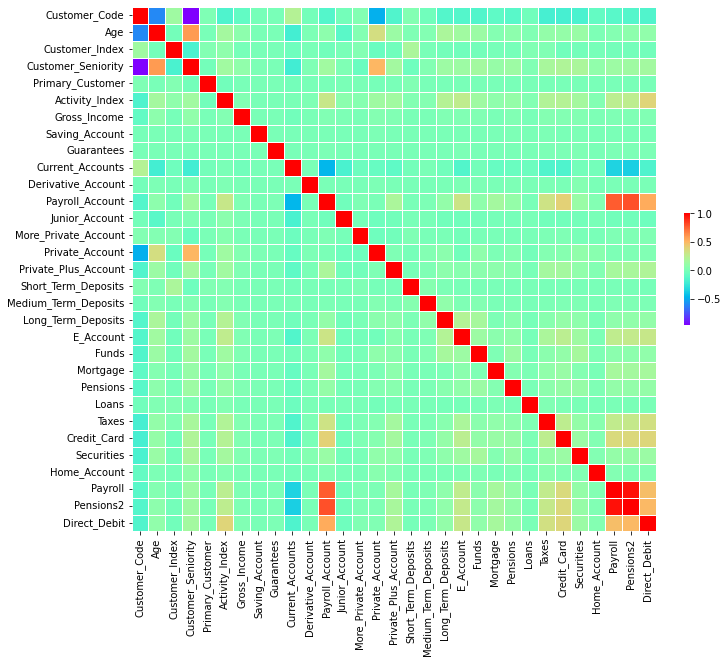

In [78]:
plt.figure(figsize=(10,10))
sns.heatmap(
    fig1, 
    square=True, cbar_kws={'fraction' : 0.01}, cmap='rainbow',
    linewidth=1
)

#### The above map shows high correlation between Payroll & Pensions2.
#### Payroll_Account has high correlation with Direct_Debit, Pensions2 & Payroll

#### What is the trend in customer distribution based on Age?

Text(0, 0.5, 'Count')

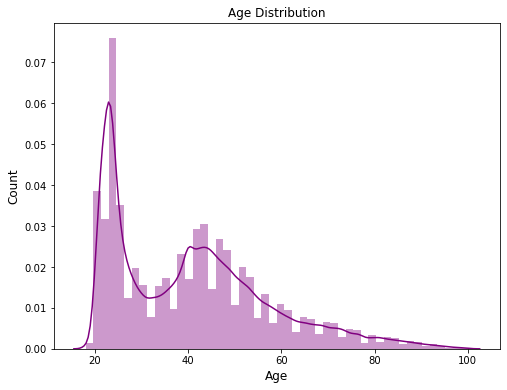

In [82]:
plt.figure(figsize=(8,6))
sns.distplot(CustomerData["Age"],
               bins=50,color="purple")
plt.title("Age Distribution")
plt.xlabel("Age", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

#### Customer count is very less below 20.
#### Highest customer range between 20 to 30
#### Customer decreases gradually from 60

#### Are the Customers related to the Company?

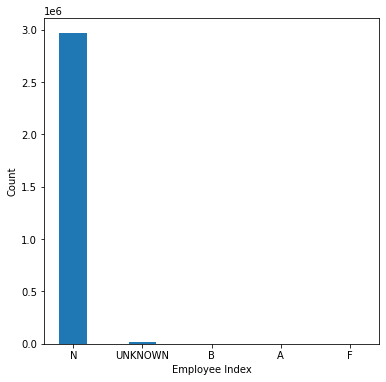

In [86]:
df3 = CustomerData.replace({'Employee_Index':{'N':'Not An Employee', 'A': 'Active Employee', 'B': 'Ex Employee', 'F': 'Employee Relative'}})
dig2 = CustomerData['Employee_Index'].value_counts()
dig2
fig, axes = plt.subplots(figsize = (6,6))
axes.bar(dig2.index, dig2.values, width=0.4)
plt.ylabel('Count')
plt.xlabel('Employee Index')
plt.show()

#### Majority of Customers are not employees

#### Which geographical location are the majority customers from?

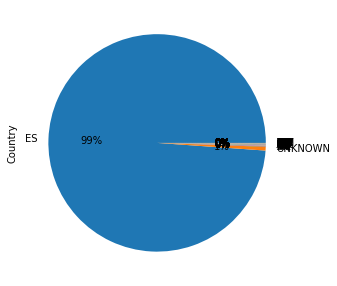

In [89]:
dig3= CustomerData['Country'].value_counts()
dig3.plot.pie(y = dig3.index, figsize=(5,5), autopct='%.0f%%')
plt.show() 

#### Majority of customers are from ES

#### Majority Customers - Male Customers or Female Customers? 

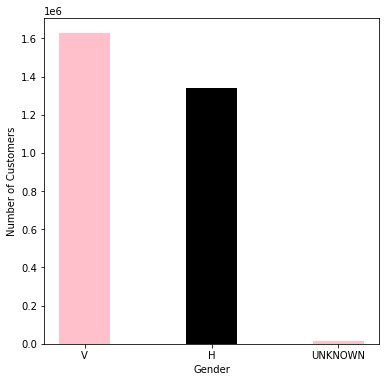

In [90]:
dig4= CustomerData['Gender'].value_counts()
fig, axes = plt.subplots(figsize = (6,6))
axes.bar(dig4.index, dig4.values, width=0.4, color = ['Pink', 'Black'])
plt.ylabel('Number of Customers')
plt.xlabel('Gender')
axes.legend
plt.show()

#### Female(V) customers are comparitvely more in number

#### Which months has highest number of occurances?

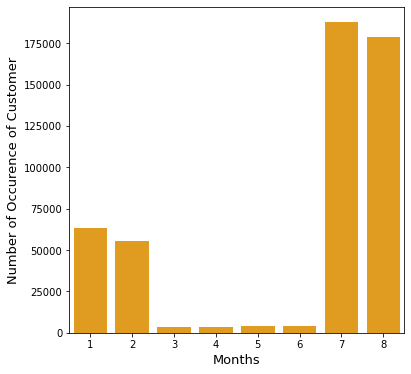

In [95]:
dig5 = CustomerData.groupby('Customer_Code').size().value_counts()
plt.figure(figsize=(6,6))
sns.barplot(dig5.index, dig5.values, color = 'orange')
plt.xlabel('Months', fontsize = 13)
plt.ylabel('Number of Occurence of Customer', fontsize = 13)
plt.show()

#### Highest occurance of customer in July, August and very less from March to June

#### What is the Status of the Customer?

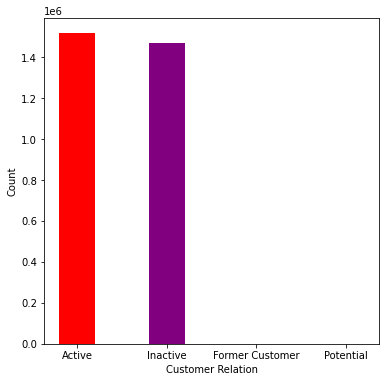

In [105]:
CustomerData = CustomerData.replace({'Customer_Relation':{'I': 'Inactive', 'A': 'Active', 'P': 'Former Customer', 'R': 'Potential'}})
dig6 = CustomerData['Customer_Relation'].value_counts(dropna = False)
fig, axes = plt.subplots(figsize = (6,6))
axes.bar(dig6.index, dig6.values, width=0.4, color = ['Red', 'Purple','Pink', 'Blue'])
plt.ylabel('Count')
plt.xlabel('Customer Relation')
axes.legend
plt.show()



#### Customers are either Active or Inactive

#### Which Customer Segment of individuals are in trending?

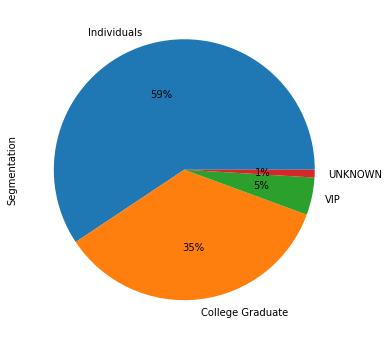

In [107]:
CustomerData = CustomerData.replace({'Segmentation':{'01 - TOP': 'VIP', '02 - PARTICULARES': 'Individuals', '03 - UNIVERSITARIO': 'College Graduate'}})
dig7= CustomerData['Segmentation'].value_counts(dropna = False)
dig7.plot.pie(y = dig7.index, figsize=(6,6), autopct='%.0f%%')
plt.show() 

#### Majority of Customers are Individuals

#### Is there any relation between Income and number of customers?

Text(0, 0.5, 'Density')

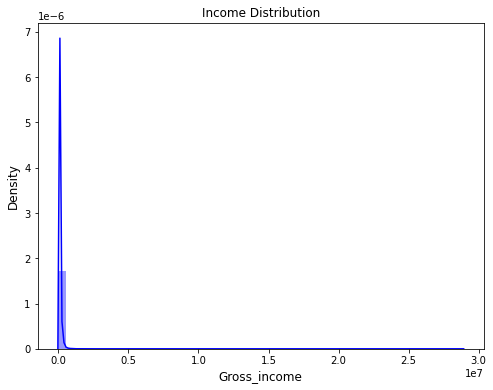

In [124]:
plt.figure(figsize=(8,6))
sns.distplot(CustomerData["Gross_Income"],
               bins=50,color="blue")
plt.title("Income Distribution")
plt.xlabel("Gross_income", fontsize = 12)
plt.ylabel("Density", fontsize = 12)

#### From above distribution plot Income is highly skewed

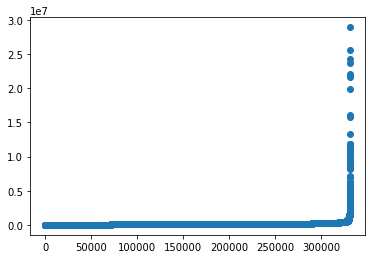

In [125]:
unique_values = np.sort(CustomerData.Gross_Income.unique())
plt.scatter(range(len(unique_values)), unique_values)
plt.show()

#### Majority Customers Gross Income is more than 300000

#### Which Channel is frequently used?

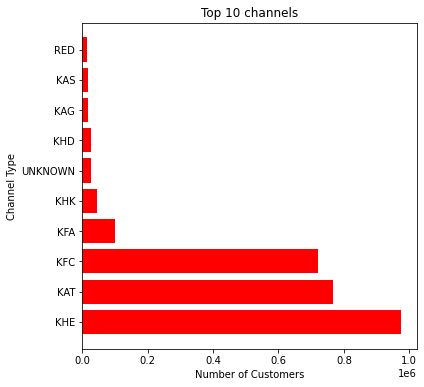

In [162]:
#top 10 channels

dig8 = CustomerData['Channel_Used'].value_counts()
dig8 = dig8.sort_values(ascending = False)
dig8 = dig8[:10]
fig, axes = plt.subplots(figsize = (6,6))
axes.barh(dig8.index, dig8.values, color="red")
plt.ylabel('Channel Type')
plt.xlabel('Number of Customers')
axes.set_title('Top 10 channels')
axes.legend
plt.show()


#### KHE is most popular channel used by about 1 million Customers

#### What kinds of products customers avail most? Purchase trend?

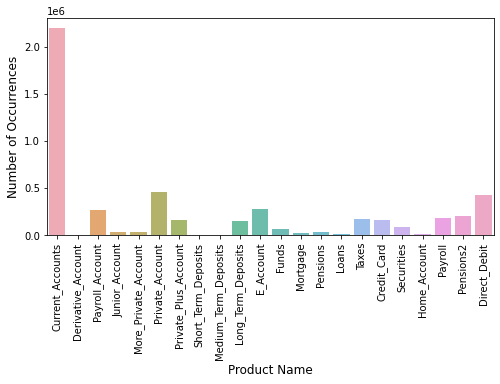

In [126]:

plt.figure(figsize=(8,4))
sns.barplot(Target.index, Target.values, alpha=0.8)
plt.xlabel('Product Name', fontsize=12)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

#### Current Account is highly preferred product

#### Is Data numerically distinct?

#### Targets distribution based on the numerical variables present in the Data

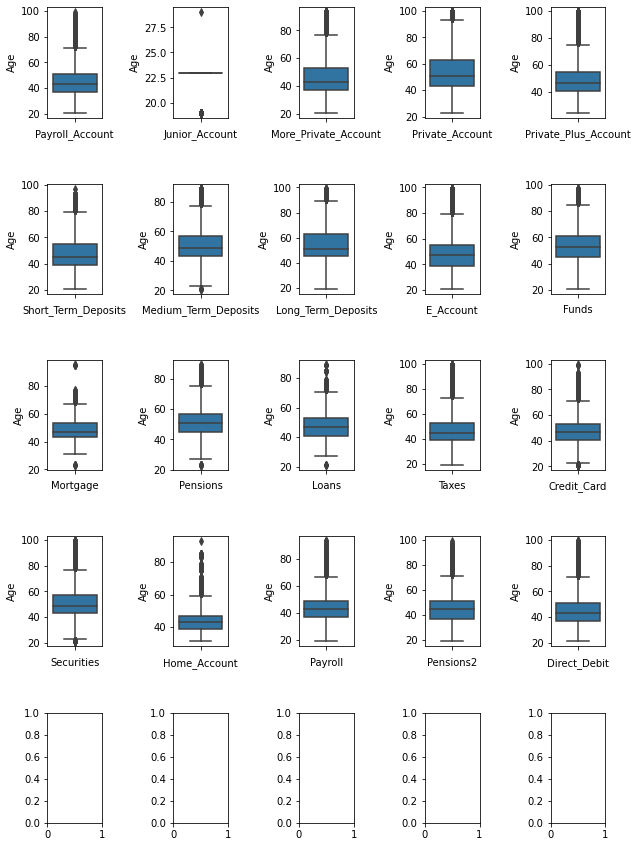

In [168]:
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(10,15))
plt.subplots_adjust(wspace=1.3, hspace=0.6)
fig_row=0
for col_id in range(24,44):
    ax_id=col_id-24
    fig_label=CustomerData.columns[col_id]
    feat=CustomerData.columns[col_id]
    fig_col=(col_id+1)%5
    box_plot=sns.boxplot(y='Age', data=CustomerData[(CustomerData[feat]==1) & CustomerData.Age], ax=axes[fig_row][fig_col])
    box_plot.set(xlabel=fig_label)
    if fig_col==4: fig_row+=1

#### Numerical variables has impact between 0's & 1's

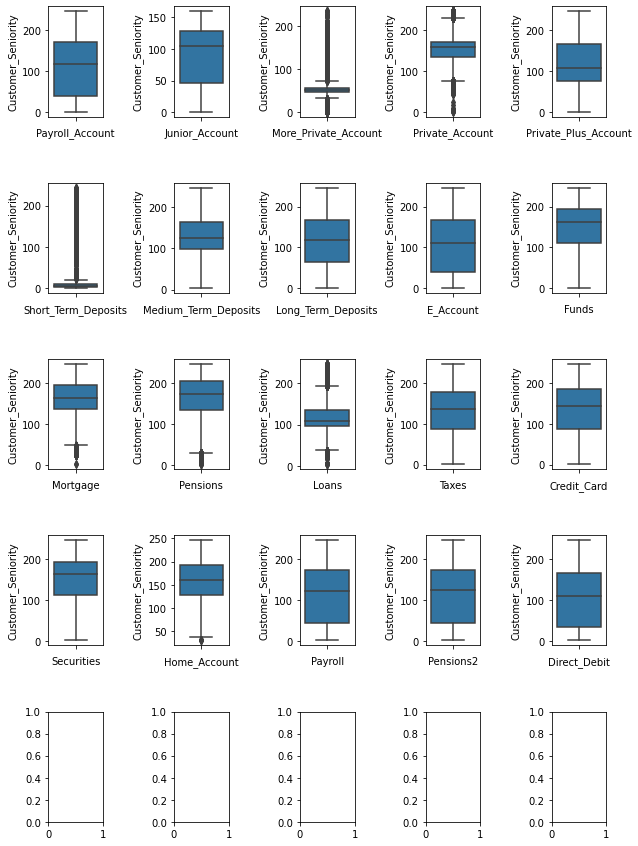

In [169]:
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(10,15))
plt.subplots_adjust(wspace=1.3, hspace=0.6)
fig_row=0
for col_id in range(24,44):
    ax_id=col_id-24
    fig_label=CustomerData.columns[col_id]
    feat=CustomerData.columns[col_id]
    fig_col=(col_id+1)%5
    box_plot=sns.boxplot(y='Customer_Seniority', data=CustomerData[(CustomerData[feat]==1) & CustomerData.Customer_Seniority], ax=axes[fig_row][fig_col])
    box_plot.set(xlabel=fig_label)
    if fig_col==4: fig_row+=1

#### This implies data is numerically distinct

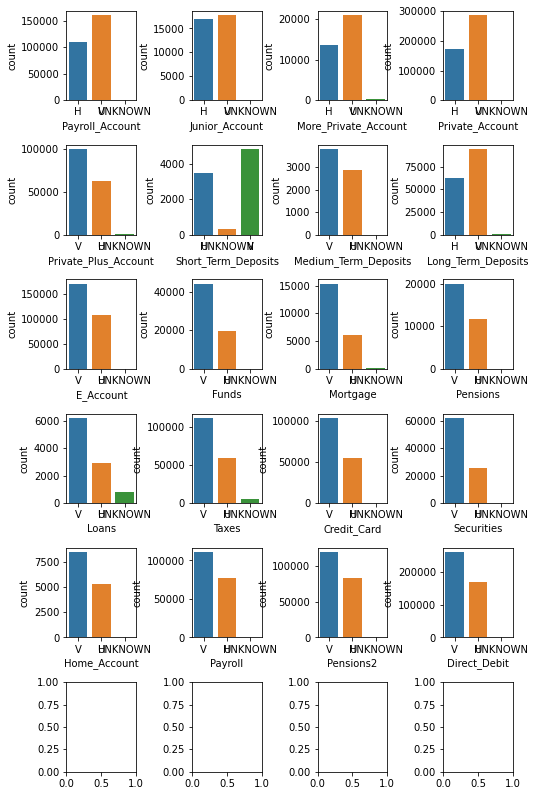

In [171]:
fig, axes = plt.subplots(nrows=6, ncols=4, figsize=(8,14))
plt.subplots_adjust(wspace=0.8, hspace=0.5)
# fig.tight_layout()
fig_row=0
for col_id in range(24, 44):
    ax_id=col_id-24
    fig_label= CustomerData.columns[col_id]
    feat=CustomerData.columns[col_id]
    fig_col=(col_id)%4
    countplot=sns.countplot(x='Gender', data=CustomerData[(CustomerData[feat]==1) & (CustomerData['Gender'].notna())],ax=axes[fig_row][fig_col])
    countplot.set(xlabel=fig_label)
    if fig_col==3: fig_row+=1

#### Targets distributed based on 'Gender' are skewed towards right. 


### Time Series Analysis

In [182]:
CustomerData['Year_of_Joining'] = CustomerData['Customer_Join_Date'].dt.year
CustomerData['Month_of_Joining'] = CustomerData['Customer_Join_Date'].dt.month
CustomerData['Day_of_Joining'] = CustomerData['Customer_Join_Date'].dt.day
CustomerData_TimeSeries = CustomerData.set_index('Customer_Join_Date')

In [183]:
CustomerData_TimeSeries.head(10)

,Date,Customer_Code,Employee_Index,Country,Gender,Age,Customer_Index,Customer_Seniority,Primary_Customer,Customer_Type,...,Credit_Card,Securities,Home_Account,Payroll,Pensions2,Direct_Debit,Average_Income_Test,Year_of_Joining,Month_of_Joining,Day_of_Joining
Customer_Join_Date,,,,,,,,,,,,,,,,,,,,,
2012-08-10,2015-01-28,1050611,N,ES,V,23,0,35.0,1.0,1,...,0,0,0,0.0,0.0,0,0,2012,8,10
2012-08-10,2015-01-28,1050613,N,ES,H,22,0,35.0,1.0,1,...,0,0,0,0.0,0.0,0,0,2012,8,10
2012-08-10,2015-01-28,1050616,N,ES,H,23,0,35.0,1.0,1,...,0,0,0,0.0,0.0,0,0,2012,8,10
2012-08-10,2015-01-28,1050617,N,ES,H,23,0,35.0,1.0,1,...,0,0,0,0.0,0.0,0,0,2012,8,10
2012-08-10,2015-01-28,1050621,N,ES,V,23,0,35.0,1.0,1,...,0,0,0,0.0,0.0,0,0,2012,8,10
2012-08-10,2015-01-28,1050622,N,ES,H,23,0,35.0,1.0,1,...,0,0,0,0.0,0.0,0,0,2012,8,10
2012-08-10,2015-01-28,1050623,N,ES,H,23,0,35.0,1.0,1,...,0,0,0,0.0,0.0,0,0,2012,8,10
2012-08-10,2015-01-28,1050626,N,ES,V,23,0,35.0,1.0,1,...,0,0,0,0.0,0.0,0,0,2012,8,10
2012-08-10,2015-01-28,1050610,N,ES,V,24,0,35.0,1.0,1,...,0,0,0,0.0,0.0,0,0,2012,8,10


## Insights from the Analysis & Recommendations

#### 
•	XYZ credit union highest Customer range is between 20 to 30. There are very less Customers below 20 and Customer number gradually decreases from 60.

•	As per analysis on Employee Index, majority of Customers are not related to Company (Not an Employee).

•	Majority of Customers are from Spain (ES) location.

•	There are more Female Customers than male Customers in XYZ Union.

•	Highest occurrences of customer is in July, August and very less from March to June.

•	Inactive Customers are in significant number close to Active Customers.

•	Individuals are high in number as compared to VIP & College Graduates.

•	Majority Customers Gross Income is more than 300000.

•	KHE is most popular channel used by about 1 million Customers.

•	Current Account is highly preferred product. Private Account, Direct Debit, Payroll Account & E_Accounts are also preferred.

Recommendations

1.	Loyalty Marketing for Active Customers

The company should allocate fewer resources to this customer, since they are already loyal and do not require high effort to be retained. They would buy the product whether there's promotion or not. To maintain their loyalty, we should use personal approach which is hopefully memorable to the customers. For examples, give them Thank-you notes, voucher as birthday gift. Also give them special offers that recognize their loyalty. This could include free delivery or free return or another top-tier benefits in loyalty program. To increase their value and buying experience, we will apply cross-selling and up-selling strategy using product recommendation.

2.	Retention Marketing for Existing Customers

The company should target its moderately loyal customers with its greatest retention efforts. Points-Pressure and Rewarded-behavior strategy might be effective this kind of customer. For example, customers have to collect certain points to unlock prize and benefits. Product recommendations and bundling offers are relevant to increase customers' buying experience.

3.	Reactivation Marketing for Inactive Customers

Customers in these groups are very risky to churn and switch to another company. The company should notify them about new products, limited products, best-selling products, and bundling offers to maintain engagement. Also improving customer service will boost customer trust and retention. 

4.	Advertising & Propaganda

Social media coverage or advertising will help customers well understand product/services provided by XYZ Credit Union.

5.  Cross-selling 

Pair high-demand products with less moving products in cross-selling.

6.	Upselling

Maintain different Membership levels. This will help the Customers to avail for their money to choose level-one membership above basic one.

